In [14]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

# Loading the dataset
**CIFAR10**
*   size=32*32*3
*   total images=60,000
*   images for training=50,000
*   images for testing=10,000
*   no. of classes=1











In [15]:
# combining two trasformation i.e converting img to tensor and normalizing it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

#TRAIN DATA
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

#TEST DATA
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


# Creating batchsize

In [16]:
#for training
bat=256
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bat, shuffle=True)

#for testing
testloader = torch.utils.data.DataLoader(testset, batch_size=bat, shuffle=False)

In [17]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# Model class

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #conv layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        #fully connected layers
        self.fc1 = nn.Linear(4*4*64,500)
        self.fc2 = nn.Linear(500, 10) #no. od classes are 10

        #forward propagtion

    def forward(self, x):
        x = F.relu(self.conv1(x)) #applying activation func
        x=F.max_pool2d(x,2,2)  #using maxpooling w kernel(2,2) n stride of 2

        x = F.relu(self.conv2(x)) #applying activation func
        x=F.max_pool2d(x,2,2)  #using maxpooling w kernel(2,2) n stride of 2

        x = F.relu(self.conv3(x)) #applying activation func
        x=F.max_pool2d(x,2,2)  #using maxpooling w kernel(2,2) n stride of 2

        x = x.view(-1, 4*4*64) #flattening the img
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# create instance of class,loss func & optimizer

In [19]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001) #smaller that learning rate the slower it converges

# Training and testing the model

In [20]:
# Variables
epochs = 10
run_loss_hist = []
run_correct_hist = []
val_loss_hist = []
val_correct_hist = []

for e in range(epochs):
    run_loss = 0.0
    run_correct = 0.0
    val_run_loss = 0.0
    val_run_correct = 0.0

    # Training loop
    for ip, label in trainloader:
        op = model(ip)  # Predicted values from training set
        loss = criterion(op, label)  # Predicted vs actual answers

        # Updating the parameters
        optimizer.zero_grad()  # No gradient required
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(op.data, 1)  # Adds up no. of correct predictions
        run_loss += loss.item()
        run_correct += torch.sum(predicted == label.data)  # How many correct from this batch

    # Testing the model
    with torch.no_grad():
        for val_ip, val_label in testloader:
            val_op = model(val_ip)
            val_loss = criterion(val_op, val_label)  # Use val_op here
            val_run_loss += val_loss.item()  # Accumulate validation loss

            _, predicted = torch.max(val_op.data, 1)  # Use val_op here
            val_run_correct += torch.sum(predicted == val_label.data)

    # Calculate loss and accuracy for training
    epoch_loss = run_loss / len(trainloader)  # Loss per epoch
    epoch_acc = run_correct.float() / (len(trainloader)*bat)

    run_loss_hist.append(epoch_loss)  # Keeping track of loss
    run_correct_hist.append(epoch_acc)  # Keeping track of accuracy

    # Calculate loss and accuracy for validation
    val_epoch_loss = val_run_loss / len(testloader)  # Loss per epoch
    val_epoch_acc = val_run_correct.float() / (len(testloader)*bat)

    val_loss_hist.append(val_epoch_loss)  # Keeping track of loss
    val_correct_hist.append(val_epoch_acc)  # Keeping track of accuracy

    # Print statements after each epoch
    print('Epoch:', (e + 1))
    print('Training Loss:', epoch_loss)
    print('Training Accuracy:', epoch_acc.item())
    print('Validation Loss:', val_epoch_loss)
    print('Validation Accuracy:', val_epoch_acc.item())


Epoch: 1
Training Loss: 1.624149917339792
Training Accuracy: 0.4098971486091614
Validation Loss: 1.3642414540052414
Validation Accuracy: 0.49150389432907104
Epoch: 2
Training Loss: 1.2717656213410047
Training Accuracy: 0.5409359335899353
Validation Loss: 1.1908883661031724
Validation Accuracy: 0.556640625
Epoch: 3
Training Loss: 1.0976727902889252
Training Accuracy: 0.6085578799247742
Validation Loss: 1.0770124599337578
Validation Accuracy: 0.5967773199081421
Epoch: 4
Training Loss: 0.9812185408509507
Training Accuracy: 0.649015486240387
Validation Loss: 0.9898780956864357
Validation Accuracy: 0.623730480670929
Epoch: 5
Training Loss: 0.9018905591599795
Training Accuracy: 0.680265486240387
Validation Loss: 0.9542000964283943
Validation Accuracy: 0.648144543170929
Epoch: 6
Training Loss: 0.8258209249802998
Training Accuracy: 0.706632673740387
Validation Loss: 0.8777405500411988
Validation Accuracy: 0.6729491949081421
Epoch: 7
Training Loss: 0.7612443414269662
Training Accuracy: 0.730329

# Prediction

Predicted: automobile


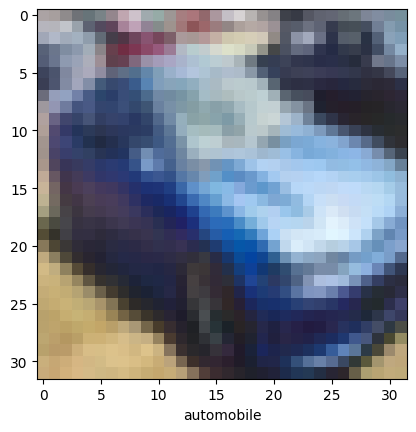

In [21]:
ind = random.randint(0, len(testset) - 1)#creating an index
image, label = testset[ind] #image for that specific index from test set
plt.imshow(image.permute(1, 2, 0) / 2 + 0.5)  # Denormalize for display
plt.xlabel(classes[label])
image = image.unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    pred = model(image)     #passing that random image through model for predction

print(f'Predicted: {classes[torch.argmax(pred).item()]}')

# Loss record

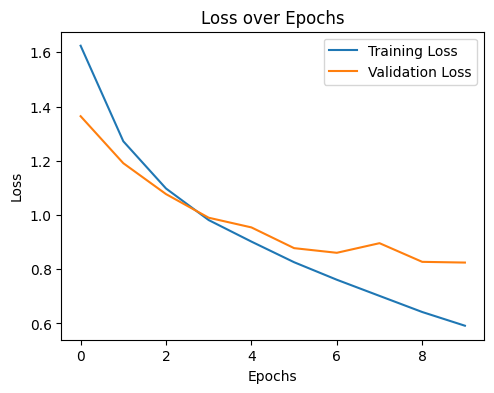

In [22]:
# Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(run_loss_hist, label='Training Loss')
plt.plot(val_loss_hist, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Accuracy record

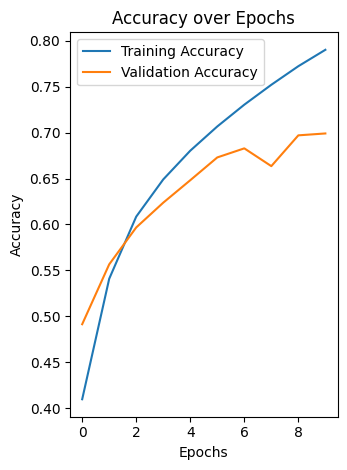

In [23]:
plt.subplot(1, 2, 2)
plt.plot(run_correct_hist, label='Training Accuracy')
plt.plot(val_correct_hist, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()